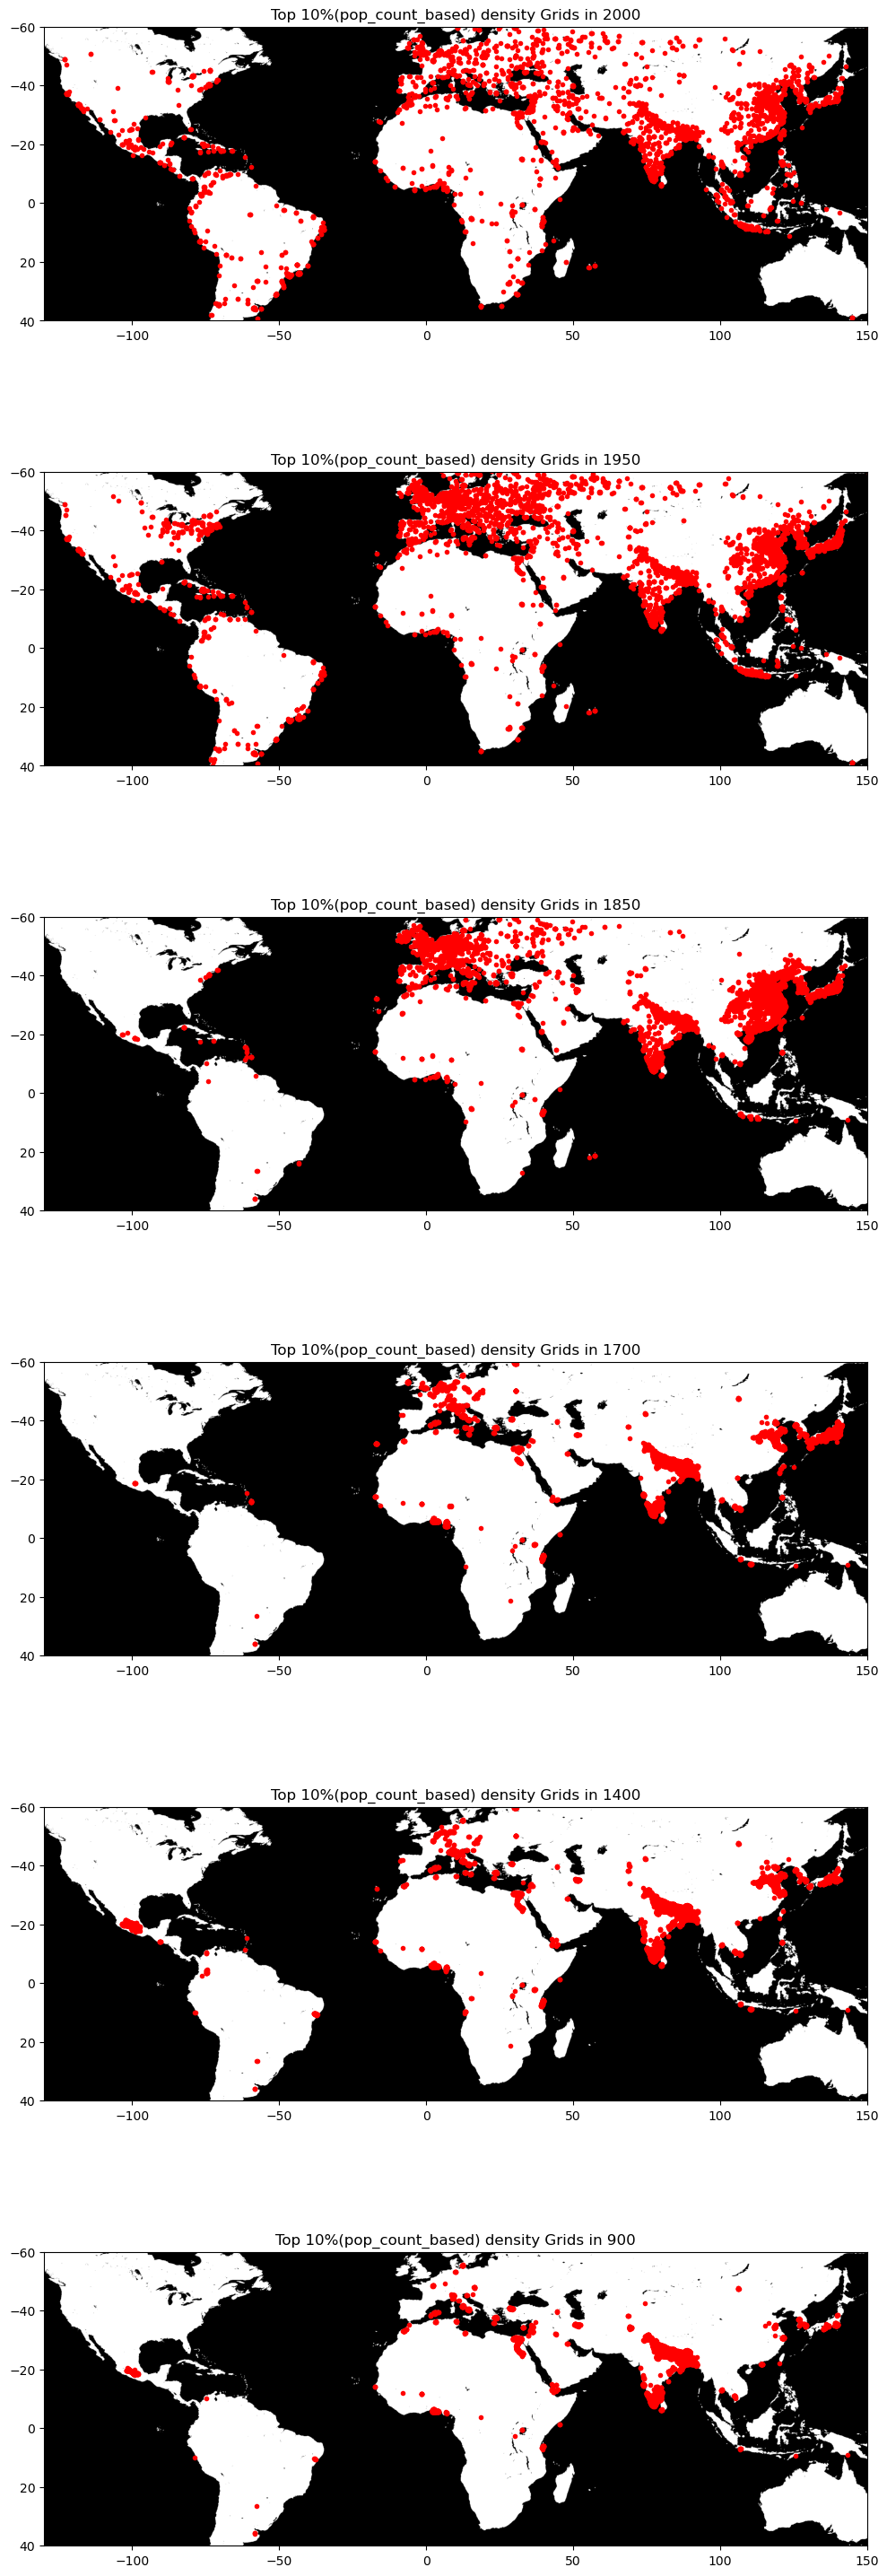

In [6]:
import matplotlib.pyplot as plt
import numpy as np

years = [2000,1950, 1850, 1700, 1400, 900]
pop_count_data_ = {
    2000: 'pop_count_data_2000',
    1950: 'pop_count_data_1950',
    1850: 'pop_count_data_1850',
    1700: 'pop_count_data_1700',
    1400: 'pop_count_data_1400',
    900: 'pop_count_data_900',
}

pop_density_data_= {
    2000: 'pop_density_data_2000',
    1950: 'pop_density_data_1950',
    1850: 'pop_density_data_1850',
    1700: 'pop_density_data_1700',
    1400: 'pop_density_data_1400',
    900: 'pop_density_data_900',
}



fig, axs = plt.subplots(len(years), 1, figsize=(10, 5*len(years)))
for idx, year in enumerate(years):
    # その年のデータを取得
    data_year = np.load(f"{pop_density_data_[year]}.npy")
    pop_count_data_year = np.load(f"{pop_count_data_[year]}.npy")

    # 人口データを降順にソート
    sorted_indices = np.argsort(data_year, axis=None)[::-1]

    # pop_count_dataを同じ順序でソート
    sorted_pop_count_data = pop_count_data_year.flatten()[sorted_indices]
   
    # 総人口の20%を計算
    total_population = np.nansum(pop_count_data_year[pop_count_data_year >= 0])
    twenty_percent_population = total_population * 0.2

    # 総人口の20%に達するまでのグリッドを取り出す
    cumulative_population = 0
    i = 0
    while cumulative_population < twenty_percent_population:
        cumulative_population += sorted_pop_count_data[i]
        i += 1

    # 上記の条件を満たすグリッドを取り出す
    top_grids_year = sorted_indices[:i]

    # 人口が最も多いグリッドの位置を取得
    indices = np.unravel_index(top_grids_year, data_year.shape)

    # 緯度と経度を計算
    latitudes = -90 + (indices[0] + 0.5) * (180 / 2140)
    longitudes = -180 + (indices[1] + 0.5) * (360 / 4320)

    # population_potentialの値が0以上であるグリッドを灰色で描く
    axs[idx].imshow(data_year >= 0, cmap='gray', extent=[-180, 180, -90, 90], origin='lower')

    # データをプロット
    axs[idx].scatter(longitudes, latitudes, c='red', marker='.')
    axs[idx].set_title(f'Top 10%(pop_count_based) density Grids in {year}')
    axs[idx].set_xlim(-130, 150)
    axs[idx].set_ylim(40, -60)

plt.tight_layout()
plt.show()

In [8]:
import matplotlib.pyplot as plt
import numpy as np

years = [2000, 1950, 1850, 1700, 1400, 900]
pop_count_data_ = {
    2000: 'pop_count_data_2000',
    1950: 'pop_count_data_1950',
    1850: 'pop_count_data_1850',
    1700: 'pop_count_data_1700',
    1400: 'pop_count_data_1400',
    900: 'pop_count_data_900',
}

pop_density_data_ = {
    2000: 'pop_density_data_2000',
    1950: 'pop_density_data_1950',
    1850: 'pop_density_data_1850',
    1700: 'pop_density_data_1700',
    1400: 'pop_density_data_1400',
    900: 'pop_density_data_900',
}

for year in years:
    # その年のデータを取得
    data_year = np.load(f"{pop_density_data_[year]}.npy")
    pop_count_data_year = np.load(f"{pop_count_data_[year]}.npy")

    # 人口データを降順にソート
    sorted_indices = np.argsort(data_year, axis=None)[::-1]

    # pop_count_dataを同じ順序でソート
    sorted_pop_count_data = pop_count_data_year.flatten()[sorted_indices]

    # 総人口の20%を計算
    total_population = np.nansum(pop_count_data_year[pop_count_data_year >= 0])
    twenty_percent_population = total_population * 0.1

    # 総人口の20%に達するまでのグリッドを取り出す
    cumulative_population = 0
    i = 0
    while cumulative_population < twenty_percent_population:
        cumulative_population += sorted_pop_count_data[i]
        i += 1

    # 上記の条件を満たすグリッドを取り出す
    top_grids_year = sorted_indices[:i]

    # 人口が最も多いグリッドの位置を取得
    indices = np.unravel_index(top_grids_year, data_year.shape)

    # 緯度と経度を計算
    latitudes = -90 + (indices[0] + 0.5) * (180 / 2140)
    longitudes = -180 + (indices[1] + 0.5) * (360 / 4320)

    # 図を作成
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(data_year >= 0, cmap='gray', extent=[-180, 180, -90, 90], origin='lower')
    ax.scatter(longitudes, latitudes, c='red', marker='.')
    ax.set_title(f'Top density Grids that contain 10% of the whole population in {year}')
    ax.set_xlim(-130, 160)
    ax.set_ylim(40, -60)

    # 図を保存
    plt.tight_layout()
    plt.savefig(f"top_10_percent_population_grids_{year}.png")
    plt.close()

In [3]:
import matplotlib.pyplot as plt
import numpy as np

years = [2000, 1950, 1850, 1700, 1400, 900]
pop_count_data_ = {
    2000: 'pop_count_data_2000',
    1950: 'pop_count_data_1950',
    1850: 'pop_count_data_1850',
    1700: 'pop_count_data_1700',
    1400: 'pop_count_data_1400',
    900: 'pop_count_data_900',
}

pop_density_data_ = {
    2000: 'pop_density_data_2000',
    1950: 'pop_density_data_1950',
    1850: 'pop_density_data_1850',
    1700: 'pop_density_data_1700',
    1400: 'pop_density_data_1400',
    900: 'pop_density_data_900',
}

for year in years:
    # その年のデータを取得
    data_year = np.load(f"{pop_density_data_[year]}.npy")
    pop_count_data_year = np.load(f"{pop_count_data_[year]}.npy")

    # 人口データを降順にソート
    sorted_indices = np.argsort(data_year, axis=None)[::-1]

    # pop_count_dataを同じ順序でソート
    sorted_pop_count_data = pop_count_data_year.flatten()[sorted_indices]

    # 総人口の20%を計算
    total_population = np.nansum(pop_count_data_year[pop_count_data_year >= 0])
    twenty_percent_population = total_population * 0.2

    # 総人口の20%に達するまでのグリッドを取り出す
    cumulative_population = 0
    i = 0
    while cumulative_population < twenty_percent_population:
        cumulative_population += sorted_pop_count_data[i]
        i += 1

    # 上記の条件を満たすグリッドを取り出す
    top_grids_year = sorted_indices[:i]

    # 人口が最も多いグリッドの位置を取得
    indices = np.unravel_index(top_grids_year, data_year.shape)
    print(len(indices[0]))

    # 緯度と経度を計算
    latitudes = -90 + (indices[0] + 0.5) * (180 / 2140)
    longitudes = -180 + (indices[1] + 0.5) * (360 / 4320)

    # 図を作成
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(data_year >= 0, cmap='gray', extent=[-180, 180, -90, 90], origin='lower')
    ax.scatter(longitudes, latitudes, c='red', marker='.')
    ax.set_title(f'Top density Grids that contain 20% of the whole population in {year}')
    ax.set_xlim(-130, 160)
    ax.set_ylim(40, -60)

    # 図を保存
    plt.tight_layout()
    plt.savefig(f"top_20_percent_population_grids_{year}.png")
    plt.close()

3343
5527
9287
10082
10555
8193


In [2]:
import matplotlib.pyplot as plt
import numpy as np

years = [2000, 1950, 1850, 1700, 1400, 900]
pop_count_data_ = {
    2000: 'pop_count_data_2000',
    1950: 'pop_count_data_1950',
    1850: 'pop_count_data_1850',
    1700: 'pop_count_data_1700',
    1400: 'pop_count_data_1400',
    900: 'pop_count_data_900',
}

pop_density_data_ = {
    2000: 'pop_density_data_2000',
    1950: 'pop_density_data_1950',
    1850: 'pop_density_data_1850',
    1700: 'pop_density_data_1700',
    1400: 'pop_density_data_1400',
    900: 'pop_density_data_900',
}

for year in years:
    # その年のデータを取得
    data_year = np.load(f"{pop_density_data_[year]}.npy")
    pop_count_data_year = np.load(f"{pop_count_data_[year]}.npy")

    # 人口データを降順にソート
    sorted_indices = np.argsort(data_year, axis=None)[::-1]

    # pop_count_dataを同じ順序でソート
    sorted_pop_count_data = pop_count_data_year.flatten()[sorted_indices]

    # 総人口の10%を計算
    total_population = np.nansum(pop_count_data_year[pop_count_data_year >= 0])
    ten_percent_population = total_population * 0.1

    # 総人口の10%に達するまでのグリッドを取り出す
    cumulative_population = 0
    i = 0
    while cumulative_population < ten_percent_population:
        cumulative_population += sorted_pop_count_data[i]
        i += 1

    # 上記の条件を満たすグリッドを取り出す
    top_grids_year = sorted_indices[:i]

    # 人口が最も多いグリッドの位置を取得
    indices = np.unravel_index(top_grids_year, data_year.shape)
    print(len(indices[0]))
    # 緯度と経度を計算
    latitudes = -90 + (indices[0] + 0.5) * (180 / 2140)
    longitudes = -180 + (indices[1] + 0.5) * (360 / 4320)

    # 陸地と海を区別する配列を作成
    land_and_sea = np.zeros_like(data_year)
    land_and_sea[data_year >= 0] = 1  # 陸地を1（グレー）で表現

    # 図を作成
    fig, ax = plt.subplots(figsize=(10, 5))
    ax.imshow(land_and_sea, cmap='gray', extent=[-180, 180, -90, 90], origin='lower')
    ax.scatter(longitudes, latitudes, c='red', marker='.')
    ax.set_title(f'Top density Grids that contain 10% of the whole population in {year}')
    ax.set_xlim(-130, 160)
    ax.set_ylim(40, -60)

    # 図を保存
    plt.tight_layout()
    plt.savefig(f"top_10_percent_population_grids_{year}.png")
    plt.close()

854
1519
3207
3624
3713
3002


In [2]:
import numpy as np

years = [2000,1950, 1850, 1700, 1400, 900]
for year in years:

    pop_count_data = np.genfromtxt(f"popc_{year}AD.asc", skip_header=6, delimiter='')
    np.save(f"pop_count_data_{year}", pop_count_data)
    pop_density_data = np.genfromtxt(f"popd_{year}AD.asc", skip_header=6, delimiter='')
    np.save(f"pop_density_data_{year}", pop_density_data)

